#  <span style="color:white">SC1015 Mini Project : Predicting Telecom Customer Churn </span>

#####  <span style="color:white">Dataset from Kaggle https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets</span>

###  <span style="color:white">Introduction:</span>

In [220]:
# Import basic library for EDA

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [221]:
data = pd.read_csv('churn-bigml-80.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##  <span style="color:white">Exploratory Data Analysis

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [223]:
# Info of numerical data
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [224]:
df = data['Churn']
df.value_counts()


Churn
False    2278
True      388
Name: count, dtype: int64

In [225]:
# Select only the numerical columns
data_num = data.select_dtypes(include=["float64","int64"])
data_num

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [226]:
# drop "Area code" column which is categorical
data_int = data_num.drop(columns = ['Area code'])
data_int

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


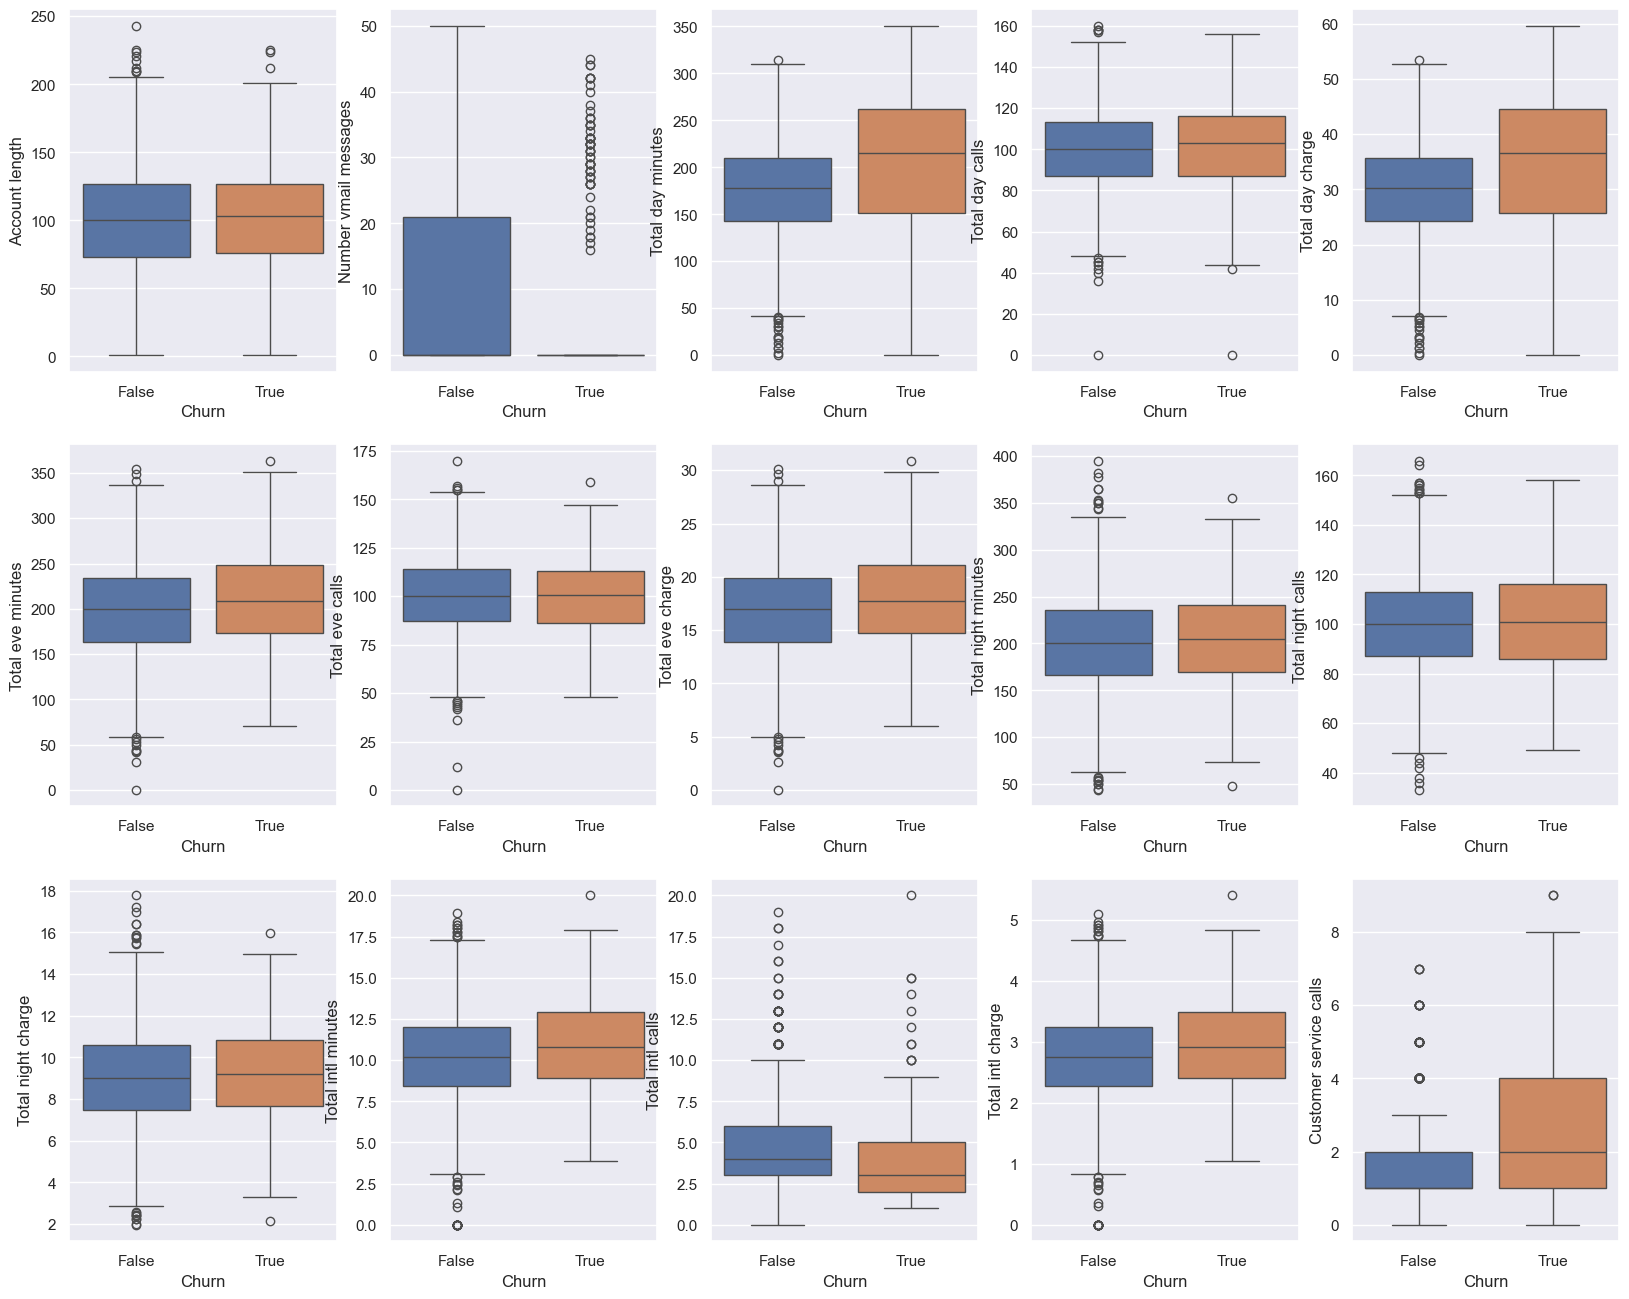

In [227]:
# Plot boxplot of numerical data against ['Churn'] to see features 
f, axes = plt.subplots(3,5, figsize=(20,16))
axes = axes.ravel()
count= 0
for var in data_int:
    sb.boxplot(x=data['Churn'], y=data[var], ax = axes[count], palette="deep")
    count +=1

In [228]:
'''
Significant variables: 

- Total day minutes
- Total day charge
- Total eve minutes
- Total eve charge
- Total intl minutes
- Total intl calls
- Total intl charge
- Customer service calls

'''

'\nSignificant variables: \n\n- Total day minutes\n- Total day charge\n- Total eve minutes\n- Total eve charge\n- Total intl minutes\n- Total intl calls\n- Total intl charge\n- Customer service calls\n\n'

In [229]:
data_cat = pd.DataFrame(data[ ['Area code','International plan', 'Voice mail plan', 'State'] ])
data_cat

,Area code,International plan,Voice mail plan,State
0,415,No,Yes,KS
1,415,No,Yes,OH
2,415,No,No,NJ
3,408,Yes,No,OH
4,415,Yes,No,OK
...,...,...,...,...
2661,415,No,No,SC
2662,415,No,Yes,AZ
2663,415,No,No,WV
2664,510,No,No,RI


In [230]:
data_cat = data_cat.astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area code           2666 non-null   category
 1   International plan  2666 non-null   category
 2   Voice mail plan     2666 non-null   category
 3   State               2666 non-null   category
dtypes: category(4)
memory usage: 13.4 KB


In [231]:
data_cat.describe()

,Area code,International plan,Voice mail plan,State
count,2666,2666,2666,2666
unique,3,2,2,51
top,415,No,No,WV
freq,1318,2396,1933,88


<Axes: xlabel='State', ylabel='count'>

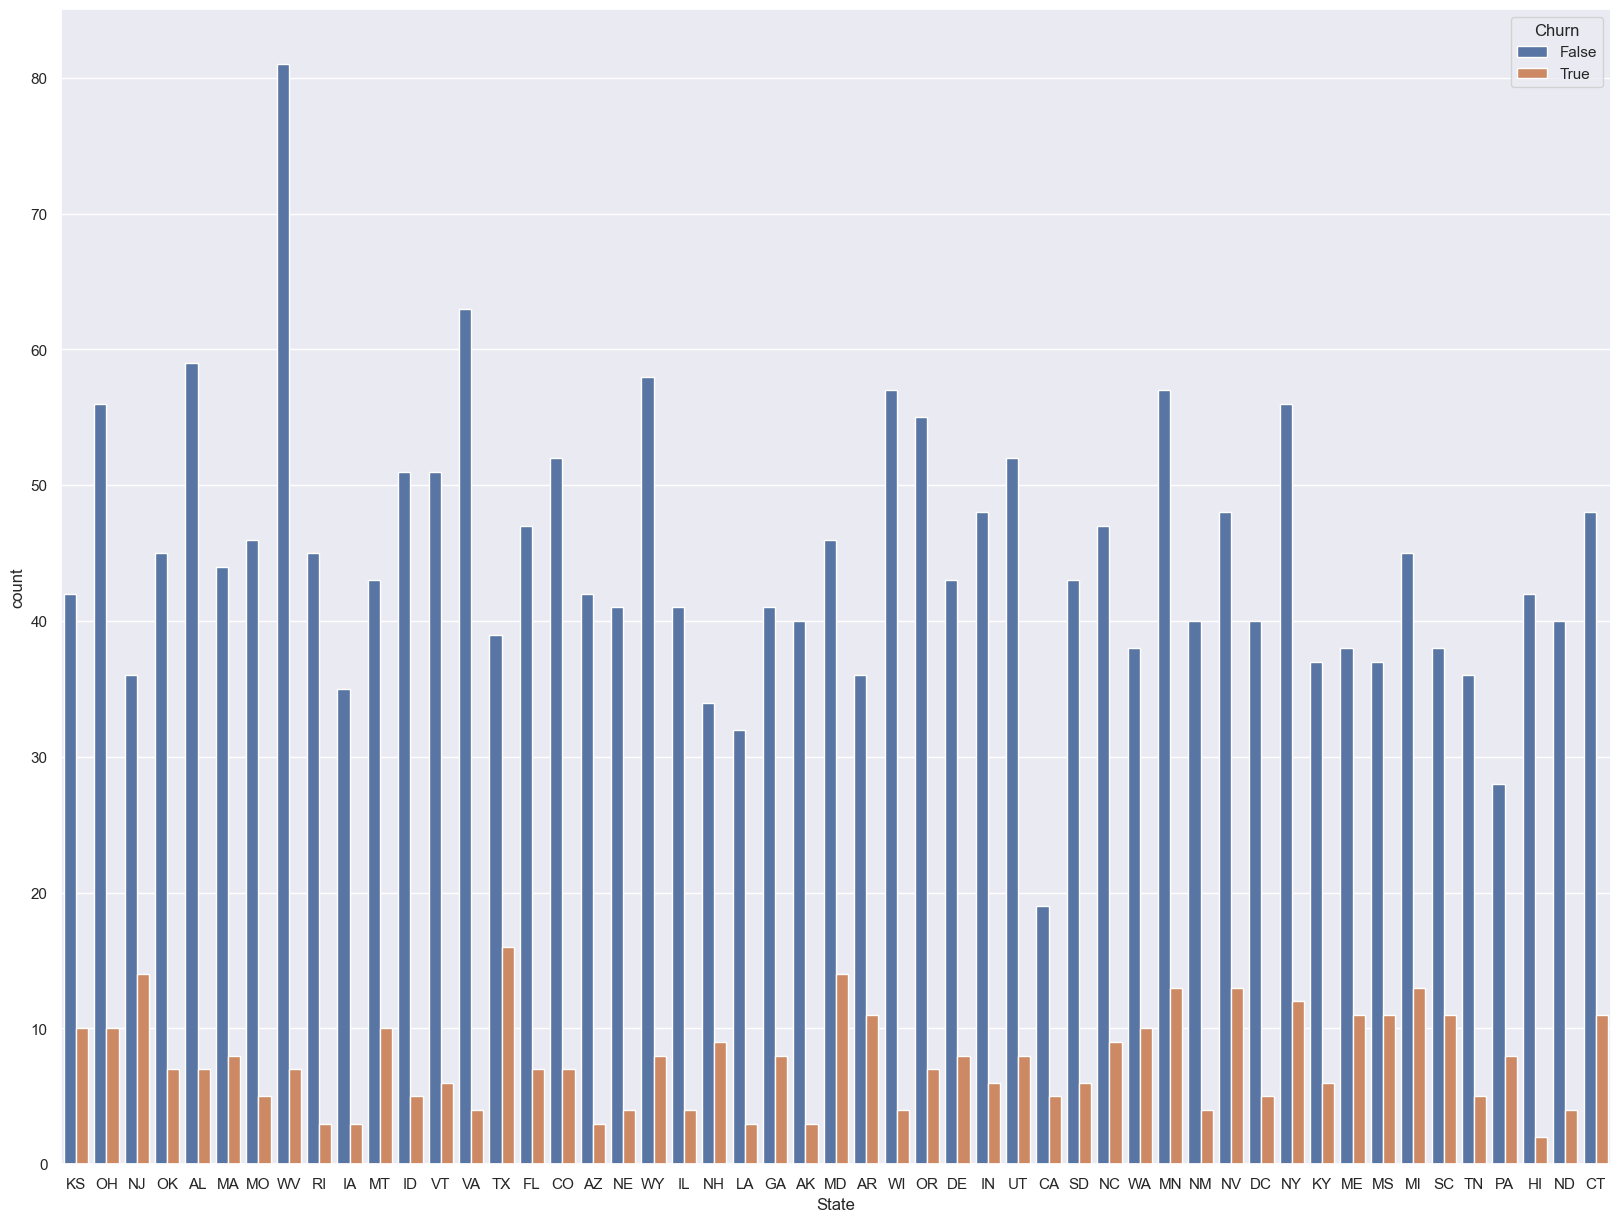

In [232]:
fig, axes = plt.subplots(figsize=(20,15))
sb.countplot( x = data['State'], hue = data['Churn'] )

In [233]:
'''
NJ, TX , MD seem to have highest churn
'''

'\nNJ, TX , MD seem to have highest churn\n'

<Axes: xlabel='International plan', ylabel='count'>

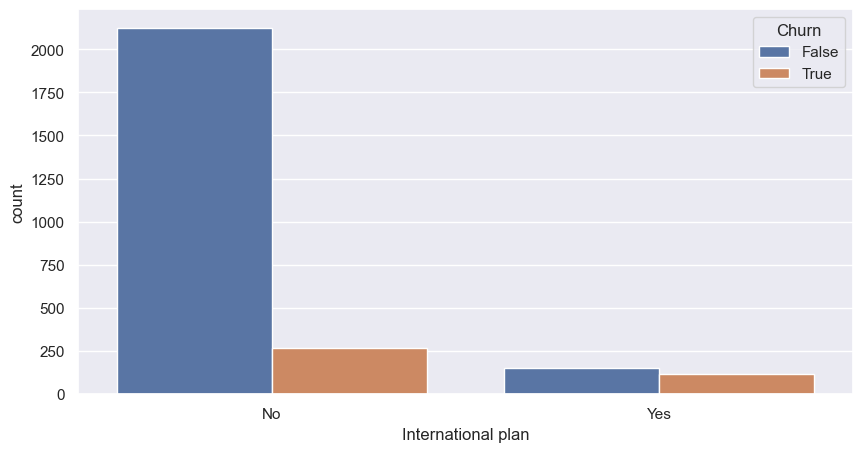

In [234]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['International plan'], hue = data['Churn'] )

<Axes: xlabel='Voice mail plan', ylabel='count'>

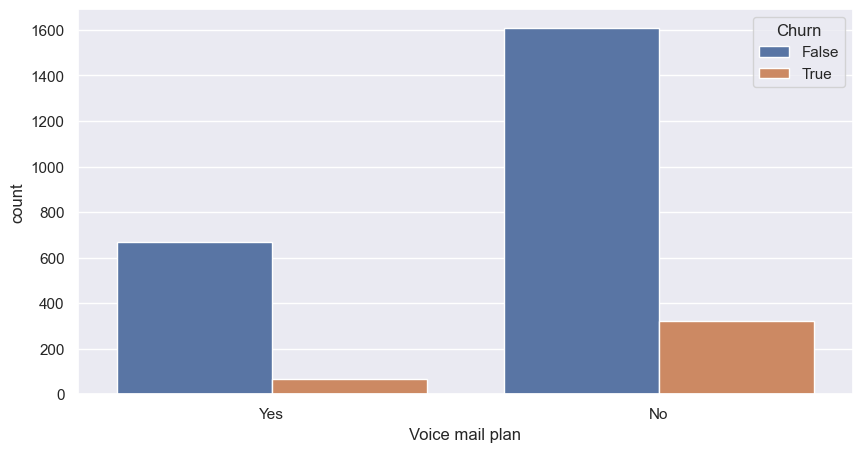

In [235]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['Voice mail plan'], hue = data['Churn'] )

####  <span style="color:white">Variables to test: <br>-Total day minutes  <br>-Total eve minutes<br>-Total night minutes <br>-Customer services calls <br>-Account Length <br>-International plan

In [236]:
intl_plan = data['International plan'].copy(deep = True)
intl_plan = intl_plan.map({'Yes':1,'No':0})
data['International plan'] = intl_plan
data['International plan'].astype('category')

0       0
1       0
2       0
3       1
4       1
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: International plan, Length: 2666, dtype: category
Categories (2, int64): [0, 1]

In [237]:
col = pd.DataFrame(data[['Total day minutes' , 'Total eve minutes' , 'Total night minutes', 'Customer service calls', 'Account length','International plan']])
col

,Total day minutes,Total eve minutes,Total night minutes,Customer service calls,Account length,International plan
0,265.1,197.4,244.7,1,128,0
1,161.6,195.5,254.4,1,107,0
2,243.4,121.2,162.6,0,137,0
3,299.4,61.9,196.9,2,84,1
4,166.7,148.3,186.9,3,75,1
...,...,...,...,...,...,...
2661,134.7,189.7,221.4,2,79,0
2662,156.2,215.5,279.1,2,192,0
2663,231.1,153.4,191.3,3,68,0
2664,180.8,288.8,191.9,2,28,0


In [238]:
# Response variable
churn = pd.DataFrame(data['Churn'])

In [239]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score

# <span style="color:white">XGBOOST</span>

### <span style="color:white">Using 6 variables

In [240]:
from xgboost import XGBClassifier

In [241]:
X_train, X_test, y_train, y_test = train_test_split(col, churn, test_size = 0.25, random_state= 42)

In [242]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, n_estimators=100,
                    n_jobs=1, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1, enable_categorical=True)

In [243]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.9, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, num_parallel_tree=None, random_state=42, ...)

In [244]:
y_pred = xgb.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

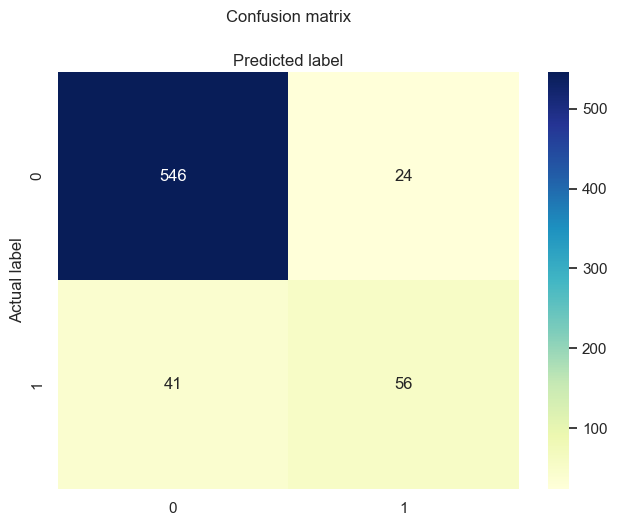

In [245]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [246]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.93      0.96      0.94       570
       Churn       0.70      0.58      0.63        97

    accuracy                           0.90       667
   macro avg       0.82      0.77      0.79       667
weighted avg       0.90      0.90      0.90       667



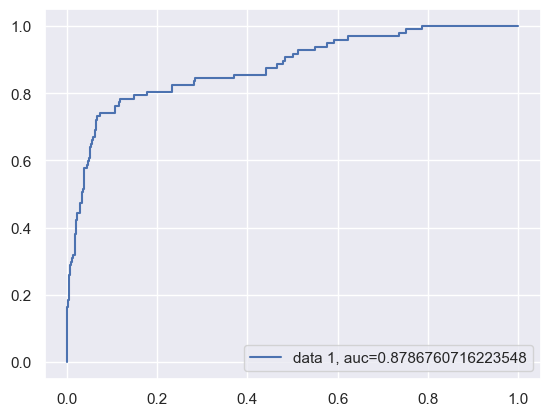

In [247]:
# ROC AUC

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### <span style="color:white">Using all variables

In [248]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [249]:
data[['State','Area code','International plan','Voice mail plan']] =  data[['State','Area code','International plan','Voice mail plan']].astype('category')

In [250]:

cols = pd.DataFrame(data[ [ 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Customer service calls', 'Total day calls', 'Total eve calls', 'Total night calls', 'Total day charge', 'Total eve charge', 'Total night charge'] ])

In [251]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Account length          2666 non-null   int64   
 1   Area code               2666 non-null   category
 2   International plan      2666 non-null   category
 3   Voice mail plan         2666 non-null   category
 4   Number vmail messages   2666 non-null   int64   
 5   Total day minutes       2666 non-null   float64 
 6   Total eve minutes       2666 non-null   float64 
 7   Total night minutes     2666 non-null   float64 
 8   Total intl minutes      2666 non-null   float64 
 9   Customer service calls  2666 non-null   int64   
 10  Total day calls         2666 non-null   int64   
 11  Total eve calls         2666 non-null   int64   
 12  Total night calls       2666 non-null   int64   
 13  Total day charge        2666 non-null   float64 
 14  Total eve charge        

In [252]:
X_train, X_test, y_train, y_test = train_test_split(cols, churn, test_size = 0.25, random_state= 42)

In [253]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, n_estimators=100,
                    n_jobs=1, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1, enable_categorical=True)

In [254]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.9, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, num_parallel_tree=None, random_state=42, ...)

In [255]:
y_pred = xgb.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

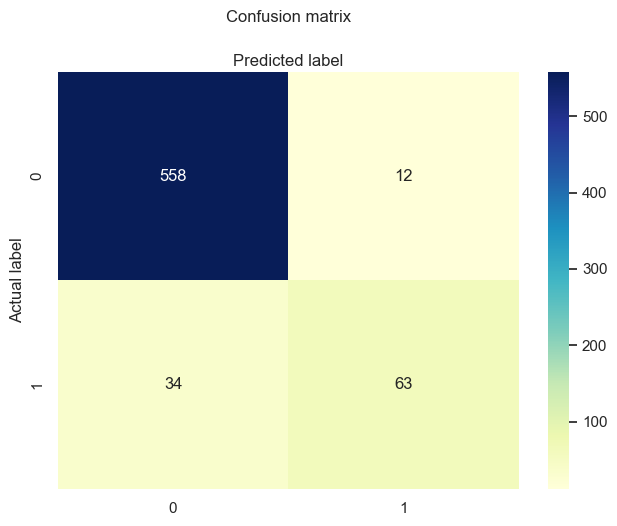

In [256]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [257]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.94      0.98      0.96       570
       Churn       0.84      0.65      0.73        97

    accuracy                           0.93       667
   macro avg       0.89      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



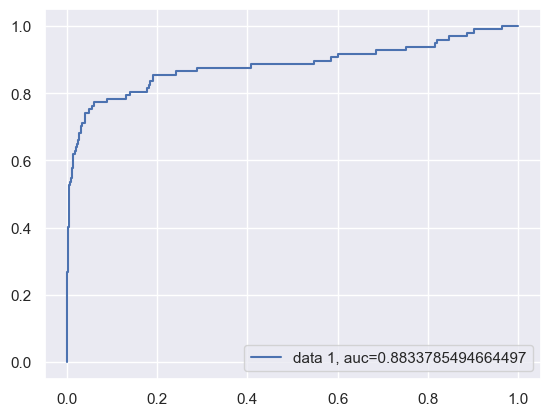

In [258]:
# ROC AUC

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [259]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

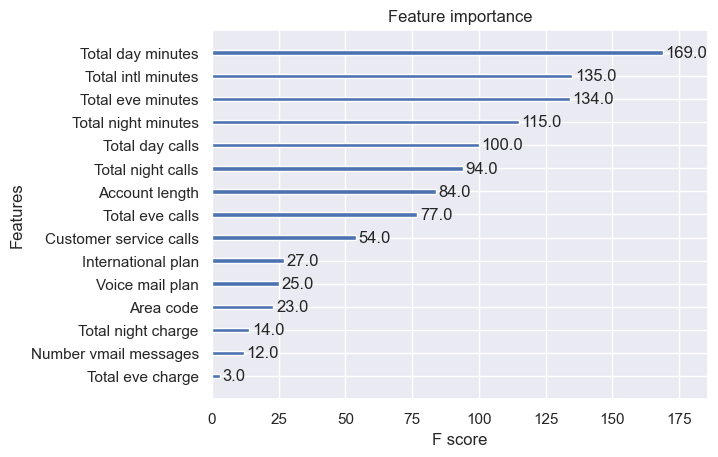

In [260]:
plot_importance(xgb.fit(X_train, y_train))

In [261]:
from sklearn.preprocessing import OneHotEncoder

In [262]:
data_cat = data[['Area code','International plan','Voice mail plan']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_test_data = encoder.fit_transform(data[data_cat])
encoded_test_cat_df = pd.DataFrame(encoded_test_data,columns = encoder.get_feature_names_out(data_cat))
churn_OHE = data
churn_OHE = churn_OHE.drop(data_cat,axis = 1)
churn_OHE = churn_OHE.drop('State',axis = 1)
churn_OHE = pd.concat([churn_OHE, encoded_test_cat_df],axis = 1)
print(f"Encoded data : \n{churn_OHE}")

Encoded data : 
      Account length  Number vmail messages  Total day minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
2661              79                      0              134.7   
2662             192                     36              156.2   
2663              68                      0              231.1   
2664              28                      0              180.8   
2665              74                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123            

In [263]:
churn_OHE

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Total intl charge,Customer service calls,Churn,Area code_408,Area code_415,Area code_510,International plan_0,International plan_1,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,False,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,False,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,...,3.19,2,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,2.67,2,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,2.59,3,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,3.81,2,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [264]:
x = churn_OHE.drop(['Churn'],axis = 1)
y = churn_OHE['Churn']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 42)

In [266]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
smote = SMOTE(random_state = 15)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [267]:
xgc = XGBClassifier()

In [268]:
xgc.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [269]:
y_pred = xgc.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

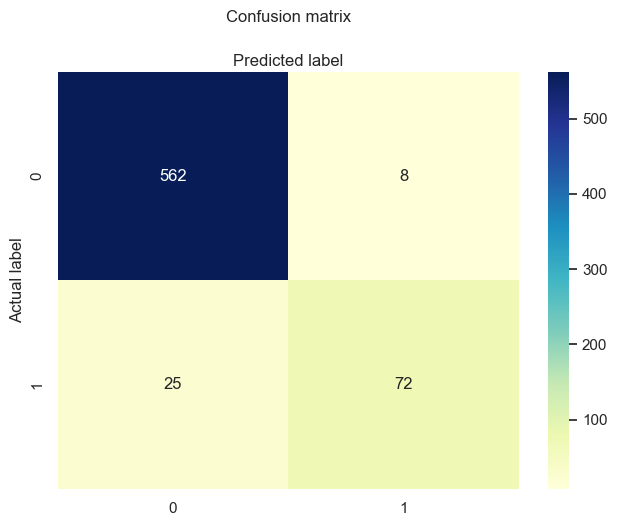

In [270]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [271]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.96      0.99      0.97       570
       Churn       0.90      0.74      0.81        97

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



In [272]:
# ROC AUC

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: feature_names mismatch: ['Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Customer service calls', 'Total day calls', 'Total eve calls', 'Total night calls', 'Total day charge', 'Total eve charge', 'Total night charge'] ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Area code_408', 'Area code_415', 'Area code_510', 'International plan_0', 'International plan_1', 'Voice mail plan_No', 'Voice mail plan_Yes']
expected Voice mail plan, International plan, Area code in input data
training data did not have the following fields: International plan_1, Area code_408, Voice mail plan_Yes, Total intl charge, Area code_510, Area code_415, International plan_0, Voice mail plan_No, Total intl calls

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

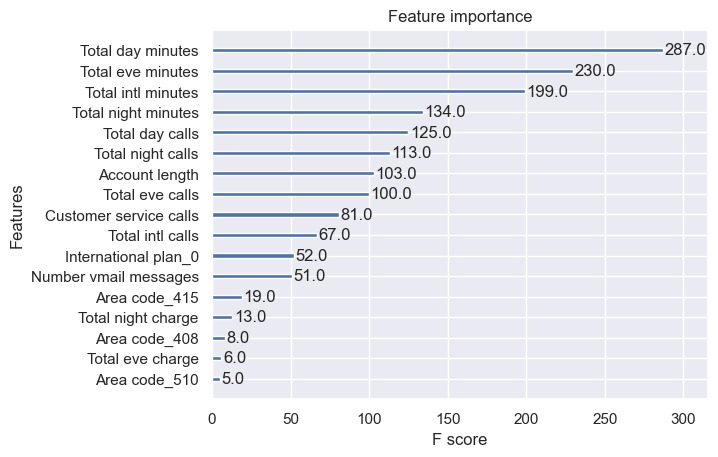

In [ ]:
plot_importance(xgc.fit(X_train, y_train))